In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({'X':[1,1,0,1],'Y':[1,1,0,0],'Z':[1,0,1,0],'label':['A','A','B','B']})
df

,X,Y,Z,label
0,1,1,1,A
1,1,1,0,A
2,0,0,1,B
3,1,0,0,B


# X feature
- total ones in 'X'=>3
- Count of label 'A' when X equal to 1=>2
- Count of label 'B' when X equal to 1=>1

- Total zeros in 'X'=>1
- Count of label 'A' when X equal to 0=>0
- Count of label 'B' when X equal to 0=>1

# etropy=E-p*log2(p)

In [3]:
# for one

# ((count of 'A' label when 'X'equals to 1/total 1's in 'X')*(log2 of same)) 
entropy_X_1=(-2/3*np.log2(2/3))+(-1/3*np.log2(1/3))
print('entropy_X_1=',entropy_X_1)

#for zero
entropy_X_0=np.nansum(-0/1*np.log2(0/1))+(-1/1*np.log2(1/1))
print('entropy_X_0=',entropy_X_0)


entropy_X_1= 0.9182958340544896
entropy_X_0= 0.0


<ipython-input-3-2d45ef3b4ead>:8: RuntimeWarning: divide by zero encountered in log2
  entropy_X_0=np.nansum(-0/1*np.log2(0/1))+(-1/1*np.log2(1/1))
<ipython-input-3-2d45ef3b4ead>:8: RuntimeWarning: invalid value encountered in double_scalars
  entropy_X_0=np.nansum(-0/1*np.log2(0/1))+(-1/1*np.log2(1/1))


Similarly for 'Y' and 'Z'

# Y feature

- total ones in 'Y'=>2
- Count of label 'A' when Y equal to 1=>2
- Count of label 'B' when Y equal to 1=>0

- Total zeros in 'Y'=>2
- Count of label 'A' when Y equal to 0=>0
- Count of label 'B' when Y equal to 0=>2

In [4]:
entropy_Y_1=np.nansum((-2/2*np.log2(2/2))+(-0/2*np.log2(0/2)))
print('entropy_Y_1=',entropy_Y_1)

#for zero
entropy_Y_0=np.nansum(-0/2*np.log2(0/2))+(-2/2*np.log2(2/2))
print('entropy_Y_0=',entropy_Y_0)

entropy_Y_1= 0.0
entropy_Y_0= 0.0


<ipython-input-4-68381d9b82cb>:1: RuntimeWarning: divide by zero encountered in log2
  entropy_Y_1=np.nansum((-2/2*np.log2(2/2))+(-0/2*np.log2(0/2)))
<ipython-input-4-68381d9b82cb>:1: RuntimeWarning: invalid value encountered in double_scalars
  entropy_Y_1=np.nansum((-2/2*np.log2(2/2))+(-0/2*np.log2(0/2)))
<ipython-input-4-68381d9b82cb>:5: RuntimeWarning: divide by zero encountered in log2
  entropy_Y_0=np.nansum(-0/2*np.log2(0/2))+(-2/2*np.log2(2/2))
<ipython-input-4-68381d9b82cb>:5: RuntimeWarning: invalid value encountered in double_scalars
  entropy_Y_0=np.nansum(-0/2*np.log2(0/2))+(-2/2*np.log2(2/2))


In [5]:
df

,X,Y,Z,label
0,1,1,1,A
1,1,1,0,A
2,0,0,1,B
3,1,0,0,B


# Z feature
- total ones in 'Z'=>2
- Count of label 'A' when Z equal to 1=>1
- Count of label 'B' when Z equal to 1=>1

- Total zeros in 'Z'=>2
- Count of label 'A' when Z equal to 0=>1
- Count of label 'B' when Z equal to 0=>1

In [6]:
entropy_Z_1=(-1/2*np.log2(1/2))+(-1/2*np.log2(1/2))
print('entropy_Z_1=',entropy_Z_1)

#for zero
entropy_Z_0=(-1/2*np.log2(1/2))+(-1/2*np.log2(1/2))
print('entropy_Z_0=',entropy_Z_0)

entropy_Z_1= 1.0
entropy_Z_0= 1.0


# Finding Information Gain using entropy
Inf. Gain=1-E sv/s*E1
Here E mean Sigma
- s= total records
- sv=Category counts(1/0)
- E=entropy
- entropy_X_1=0.918
- entropy_X_0=NAN
- entropy_Y_1=NAN
- entropy_Y_0=NAN
- entropy_Z_1=1
- entropy_Z_0=1

In [7]:
IG_X=1-(3/4*0.918+1/4*0)
print('IG_X=',IG_X)

IG_Y=1-(2/4*0+2/4*0)
print('IG_Y=',IG_Y)

IG_Z=1-(2/4*1+2/4*1)
print('IG_Z=',IG_Z)

IG_X= 0.3115
IG_Y= 1.0
IG_Z= 0.0


# Gini Indexing
- Gini Impurity=1-(sigma)p2

In [8]:
df=pd.DataFrame({'X':[17,2,10,11],'B':[20,15,50,10],'C':[10,5,20,25],'Label':['P','N','P','N']})
df

,X,B,C,Label
0,17,20,10,P
1,2,15,5,N
2,10,50,20,P
3,11,10,25,N


In [9]:
# Let's check for >=10 (how many class 'P')
# Total 3 datapoints(>=10).2 positive and 1 negative
Gx_gt_10=1-(np.square(2/3)+np.square(1/3))
print('Gx_gt_10=',Gx_gt_10)

#Total 1 data point (<10). 0 positive and 1 negative
Gx_lt_10=1-(np.square(0/1)+np.square(1/1))
print('Gx_lt_10=',Gx_lt_10)

Gx_gt_10= 0.4444444444444444
Gx_lt_10= 0.0


In [10]:
#(Total datapoints>=10/Total data points in the dataset)*gini+
#(Total datapoints<10/Total data points in the dataset)*gini
gini_impurity_X=((3/4)*Gx_gt_10)+((1/4)*Gx_lt_10)
print('gini_impurity_X',gini_impurity_X)

gini_impurity_X 0.3333333333333333


In [11]:
# similarly you can calculate for gini_impurity_B and gini_impurity_C

# Decision tree Implementation in python

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
data=pd.read_csv(r"https://raw.githubusercontent.com/training-ml/Files/main/wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [14]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

As we have categorical column(Alcohol_Content),we need to convert into numeric data using encoding method

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
ord_encoder=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=ord_encoder.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

# Override alcohol content column with codes

In [18]:
data['Alcohol_content']=df1

In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


# Plotting Heatmap(Correlation matrix)
- we can reduce the features using different techniques
- plot hitmap to visualize and find the coefficient of multi co-linearity

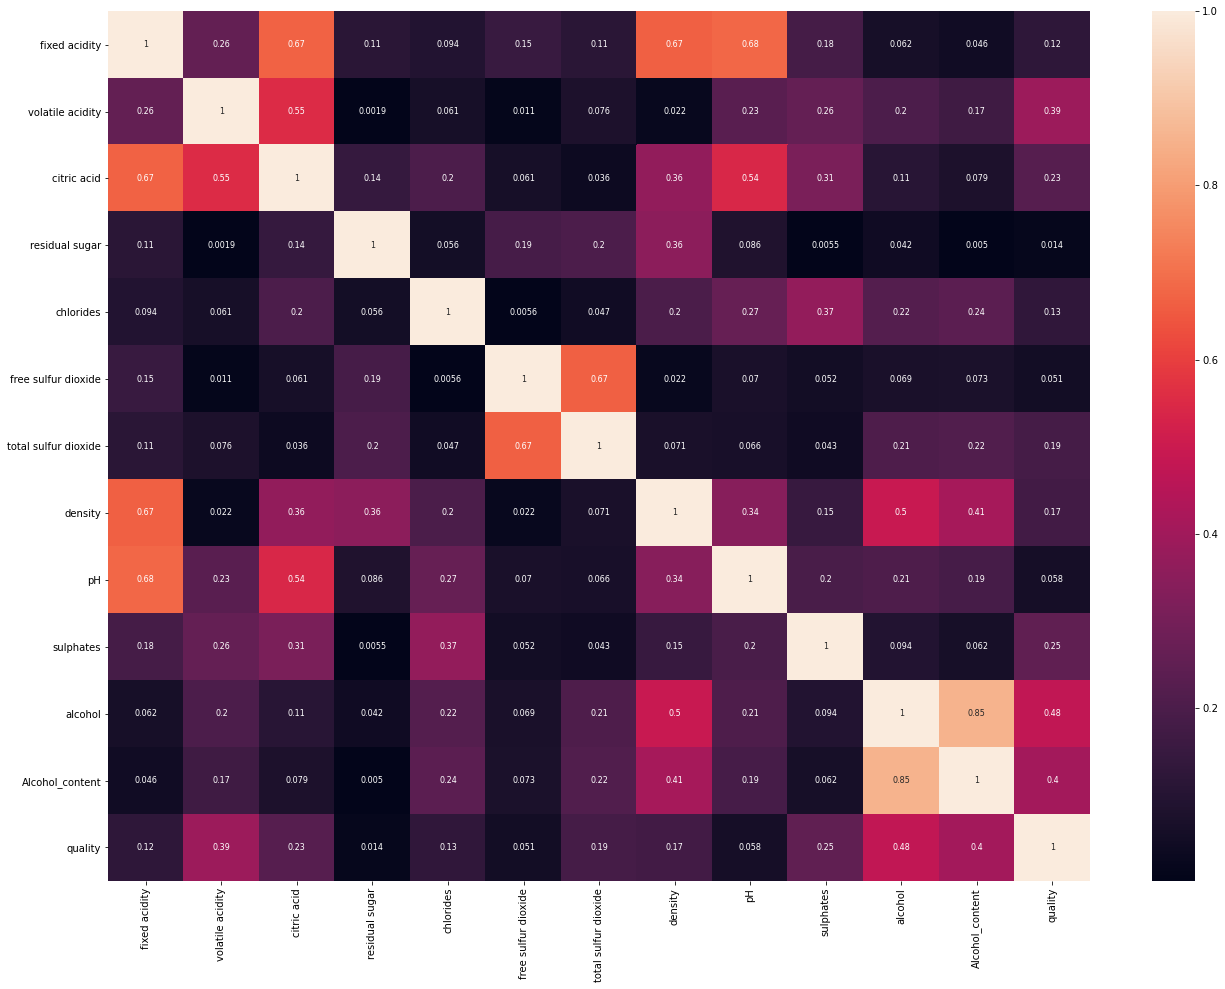

In [20]:
df_corr=data.corr().abs() # This code will get the coefficient of one variable vs all other variable(relation)
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':8})
plt.show()

## Make sure they are really correlated(It should follow some trend)

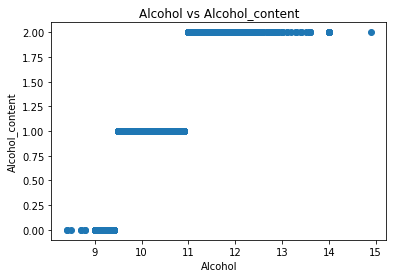

In [21]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol vs Alcohol_content')
plt.show()

### we see clear trend. As and when Alcohol level increase its content also increasing. so we can delete one of them

In [22]:
X=data.drop(columns=['quality','Alcohol_content'])
y=data['quality']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=41)

In [24]:
#let's first visualize the tree on the data without doing any preprocessing
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

### Let's see how the tree looks like(This is nothing to do with algorithm/accuracy). It's Just for visualization purpose

In [25]:
feature_name=list(X.columns)
class_name=list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [29]:
!pip install graphviz

In [27]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [31]:
!pip install GraphViz

In [34]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus

dot_data=export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myTree.png")


Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [35]:
clf.score(x_train,y_train)

1.0

In [36]:
y_pred=clf.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)

0.63

# Hyper parameters using GridSearchCV

In [38]:
#we are tuning for hyper parameter right now we are passing the difference values for both parameters 
grid_param={'criterion':['gini','entropy'],
           'max_depth':range(10,15),
           'min_samples_leaf':range(2,10),
           'min_samples_split':range(3,10)
           }

In [39]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1) #use all the cores in your system. for your performnce improvement

In [40]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [41]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [43]:
clf=DecisionTreeClassifier(criterion='entropy',min_samples_split=5,max_depth=13,min_samples_leaf=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=3,
                       min_samples_split=5)

In [44]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.5725

## Note- When you tune all the parameters there is very good chance that you can impove the accuracy

In [45]:
feature_name=list(X.columns)
class_name=list(y_train.unique())

# create a dot_file which stores the tree structure
dot_data=export_graphviz(clf,rounded=True,filled=True)
#Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree_hype.png")
#show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found